#### Cairo University - Faculty of Computers & Artificial Intelligence
#### Author (student): Khaled Waleed Al-Shaer  / ID: 20210127
#### Date: 10 Mar 2024

#### This notebook is meant to implement a KNN classifier from scratch As part of Assignment 1 of Supervised Learning Course

In [8]:
import math
import pandas as pd
import seaborn as sea
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [9]:
# loading the data from file
iris = pd.read_csv('Iris.csv')
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [10]:
# slicing the raw data to get training data
X = iris.iloc[:, 1:5]
Y = iris.iloc[:, 5]

# splitting data to training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# exploring first 5 rows to make sure we're good to go
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


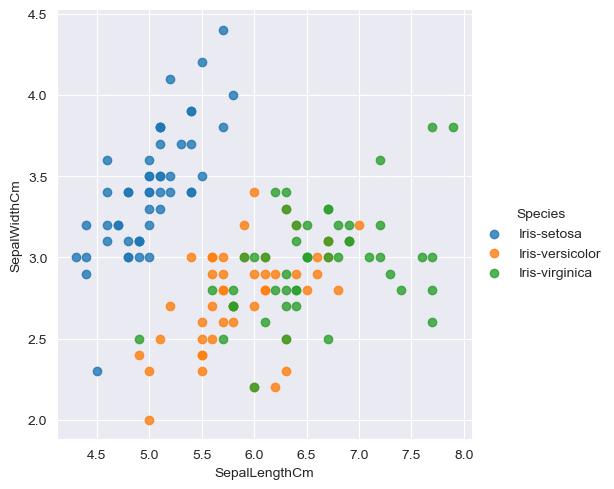

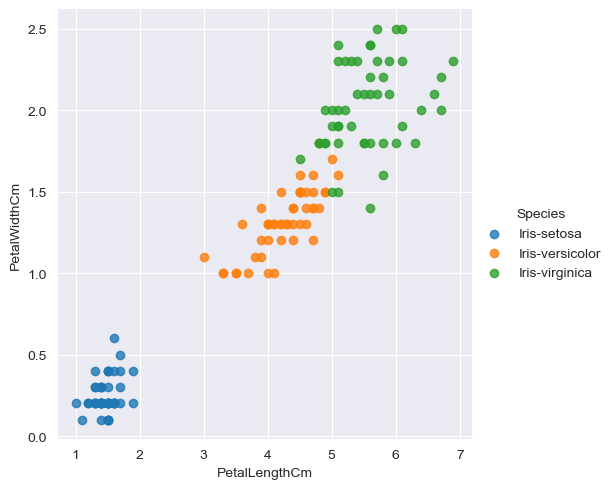

In [11]:
# plotting requested plots
sea.lmplot(x='SepalLengthCm', y='SepalWidthCm', fit_reg=False, hue='Species', data=iris)
sea.lmplot(x='PetalLengthCm', y='PetalWidthCm', fit_reg=False, hue='Species', data=iris)

In [12]:
class KNN:
    def __init__(self, k=5):
        self.trained_y = None
        self.trained_x = None
        self.k = k

    def fit(self, x, y):
        self.trained_x = np.array(x)
        self.trained_y = np.array(y)

    def distance(self, x1, x2, mode='euclidean'):
        if mode == 'euclidean':
            return math.sqrt(np.sum((x1 - x2) ** 2))
        elif mode == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif mode == 'cosine':
            return np.dot(x1,x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

    def predict(self, X, distance_calculation='euclidean'):
        # run private predict for every data point you want to predict on
        return [self._private_predict(x, distance_calculation) for x in np.array(X)]

    def _private_predict(self, point, distance_mode='euclidean'):
        distance_and_factual_y = [] # will hold tuples, each consist of distance with Y ground truth of training data
        for i in range(len(self.trained_y)):
            distance_and_factual_y.append((self.distance(point, self.trained_x[i], mode=distance_mode), self.trained_y[i]))
    
        # sorting the data to pick the best k
        distance_and_factual_y = sorted(distance_and_factual_y, key=lambda tup: tup[0])
        
        # cosine similarity is working the opposite of how distance work, higher is better so we reverse
        if distance_mode == 'cosine':
            distance_and_factual_y.reverse()
            
        # keeping the best k
        distance_and_factual_y = distance_and_factual_y[:self.k]

        # majority vote
        counter = Counter()
        for tup in distance_and_factual_y:
            counter[tup[1]] += 1

        # returning string representing the majority vote
        return counter.most_common(1)[0][0]

In [13]:
# using my model
model = KNN(5)
model.fit(X_train, Y_train)

# using builtin model
builtin = KNeighborsClassifier()
builtin.fit(X_train, Y_train)


# printing results
print(f"My Accuracy with euclidean = {accuracy_score(model.predict(X_test, 'euclidean'), Y_test)}")
print(f"My Accuracy with manhattan = {accuracy_score(model.predict(X_test, 'manhattan'), Y_test)}")
print(f"My Accuracy with cosine similarity = {accuracy_score(model.predict(X_test, 'cosine'), Y_test)}")

print(f"scikit learn Accuracy= {accuracy_score(builtin.predict(X_test), Y_test)}")


My Accuracy with euclidean = 1.0
My Accuracy with manhattan = 1.0
My Accuracy with cosine similarity = 1.0
scikit learn Accuracy= 1.0
